In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from keras.models import Model
from keras.layers import LSTM, Activation, Dense, Dropout, Input, Embedding
from keras.optimizers import RMSprop
from keras.preprocessing.text import Tokenizer
from keras.preprocessing import sequence
from keras.utils import to_categorical
from keras.callbacks import EarlyStopping
%matplotlib inline

In [14]:
import warnings

# Suppress FutureWarnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [7]:
data1 = pd.read_csv("D:\Projects\WhatsAppChatAnalyzer\dataset\Emotion(Angry).csv")
data2 = pd.read_csv("D:\Projects\WhatsAppChatAnalyzer\dataset\Emotion(Happy).csv")
data3 = pd.read_csv("D:\Projects\WhatsAppChatAnalyzer\dataset\Emotion(Sad).csv")

In [9]:
data = pd.concat([data1, data2, data3], ignore_index=True)

In [10]:
data.head()

,content,sentiment
0,"Sometimes I’m not angry, I’m hurt and there’s ...",angry
1,Not available for busy people☺,angry
2,I do not exist to impress the world. I exist t...,angry
3,Everything is getting expensive except some pe...,angry
4,My phone screen is brighter than my future 🙁,angry


<Axes: xlabel='sentiment', ylabel='count'>

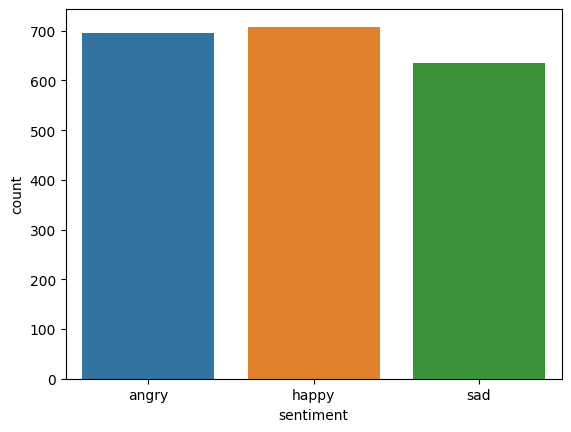

In [13]:
sns.countplot(x='sentiment',data=data)

In [15]:
X = data.content
Y = data.sentiment
le = LabelEncoder()
Y = le.fit_transform(Y)
Y = Y.reshape(-1,1)

In [16]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.15)

In [17]:
max_words = 1000
max_len = 150
tok = Tokenizer(num_words=max_words)
tok.fit_on_texts(X_train)
sequences = tok.texts_to_sequences(X_train)
sequences_matrix = sequence.pad_sequences(sequences,maxlen=max_len)

In [18]:
def RNN():
    inputs = Input(name='inputs',shape=[max_len])
    layer = Embedding(max_words,50,input_length=max_len)(inputs)
    layer = LSTM(64)(layer)
    layer = Dense(256,name='FC1')(layer)
    layer = Activation('relu')(layer)
    layer = Dropout(0.5)(layer)
    layer = Dense(3,name='out_layer')(layer)
    layer = Activation('softmax')(layer)
    model = Model(inputs=inputs,outputs=layer)
    return model

In [19]:
model = RNN()
model.summary()
model.compile(loss='sparse_categorical_crossentropy',optimizer=RMSprop(),metrics=['accuracy'])

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 inputs (InputLayer)         [(None, 150)]             0         
                                                                 
 embedding (Embedding)       (None, 150, 50)           50000     
                                                                 
 lstm (LSTM)                 (None, 64)                29440     
                                                                 
 FC1 (Dense)                 (None, 256)               16640     
                                                                 
 activation (Activation)     (None, 256)               0         
                                                                 
 dropout (Dropout)           (None, 256)               0         
                                                                 
 out_layer (Dense)           (None, 3)                 771   

In [20]:
model.fit(sequences_matrix,Y_train,batch_size=128,epochs=20,
          validation_split=0.2)

Epoch 1/20
11/11 [==============================] - 4s 131ms/step - loss: 1.0956 - accuracy: 0.3773 - val_loss: 1.0903 - val_accuracy: 0.4524
Epoch 2/20
11/11 [==============================] - 1s 90ms/step - loss: 1.0800 - accuracy: 0.4755 - val_loss: 1.0603 - val_accuracy: 0.4957
Epoch 3/20
11/11 [==============================] - 1s 92ms/step - loss: 1.0296 - accuracy: 0.5152 - val_loss: 1.0111 - val_accuracy: 0.4611
Epoch 4/20
11/11 [==============================] - 1s 90ms/step - loss: 0.9452 - accuracy: 0.5628 - val_loss: 0.9397 - val_accuracy: 0.5303
Epoch 5/20
11/11 [==============================] - 1s 92ms/step - loss: 0.8433 - accuracy: 0.6522 - val_loss: 0.8444 - val_accuracy: 0.6398
Epoch 6/20
11/11 [==============================] - 1s 94ms/step - loss: 0.7356 - accuracy: 0.7049 - val_loss: 0.7689 - val_accuracy: 0.6369
Epoch 7/20
11/11 [==============================] - 1s 101ms/step - loss: 0.6301 - accuracy: 0.7547 - val_loss: 0.6730 - val_accuracy: 0.7003
Epoch 8/20


In [21]:
test_sequences = tok.texts_to_sequences(X_test)
test_sequences_matrix = sequence.pad_sequences(test_sequences,maxlen=max_len)

In [22]:
accr = model.evaluate(test_sequences_matrix,Y_test)

10/10 [==============================] - 0s 21ms/step - loss: 0.8915 - accuracy: 0.7810


In [23]:
print('Test set\n  Loss: {:0.3f}\n  Accuracy: {:0.3f}'.format(accr[0],accr[1]))

Test set
  Loss: 0.892
  Accuracy: 0.781


In [24]:
test_sequences = tok.texts_to_sequences(X_test)
test_sequences_matrix = sequence.pad_sequences(test_sequences,maxlen=max_len)

In [25]:
accr = model.evaluate(test_sequences_matrix,Y_test)

10/10 [==============================] - 0s 30ms/step - loss: 0.8915 - accuracy: 0.7810


In [26]:
from tensorflow import keras

# Save model
model.save('my_model.h5')

# Load model
loaded_model = keras.models.load_model('my_model.h5')

d:\Projects\WhatsAppChatAnalyzer\venv\lib\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [27]:
loaded_model = keras.models.load_model('my_model.h5')

In [28]:
loaded_model